K-Means (bevezető példa, kézzel írott számjegyek klaszterezése), <br>
Python klaszterező algoritmusok összehasonlítása (KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, HDBSCAN)

ajánlott irodalom: [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a), [here](https://towardsmachinelearning.org/k-means/)

picture source: https://medium.com/towards-artificial-intelligence/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

In [1]:
from IPython.display import Image
Image("img/(un)supervised.png",width=1000)

FileNotFoundError: No such file or directory: 'img/(un)supervised.png'

FileNotFoundError: No such file or directory: 'img/(un)supervised.png'

<IPython.core.display.Image object>

https://www.tutorialspoint.com/artificial_intelligence_with_python/artificial_intelligence_with_python_unsupervised_learning_clustering.htm

### K-Means algorithm

In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [3]:
# import the make_blobs package
from sklearn.datasets import make_blobs

# use the make_blobs function to create the X and y_ture variables
# let n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0
X, y_true = make_blobs(n_samples = 500, centers = 4,
            cluster_std = 0.99, random_state = 1)

In [4]:
# check the variables X and y_true
print(X)
print(y_true)

[[ -6.92465805 -10.64436893]
 [ -8.61496295  -7.14954386]
 [ -9.63415301  -2.73277835]
 [ -2.30000743   5.29896189]
 [ -7.55710108  -3.01520811]
 [ -1.00710061   2.79532591]
 [ -4.83283366  -2.7753146 ]
 [ -5.34899947  -1.29438292]
 [ -7.96363464  -3.90047311]
 [ -5.55650076  -3.40974764]
 [ -5.16428782  -9.53100504]
 [ -7.09638118  -8.04186524]
 [ -5.83089893  -1.9747152 ]
 [ -1.83026383   3.53741004]
 [ -7.33199358  -3.16469803]
 [ -7.33796979  -6.93656207]
 [ -7.9670508   -3.37354317]
 [ -8.23417432  -8.60855891]
 [ -1.97875294   4.02627606]
 [ -4.3702185   -3.68870697]
 [-10.47207803  -3.60668306]
 [-11.00937959  -3.16676559]
 [ -5.18358141  -4.30606397]
 [ -2.39924662   6.08201992]
 [ -6.71702798  -2.88645184]
 [ -6.586214    -4.42034538]
 [ -1.46324318   4.52430843]
 [ -0.92640902   3.46232627]
 [-10.40523528  -2.68760575]
 [ -6.36630377  -3.32428197]
 [ -6.73103345  -7.15524333]
 [ -2.27336074   5.09754158]
 [ -5.8531348   -3.04019587]
 [ -6.08978003  -7.0926882 ]
 [ -5.27690896

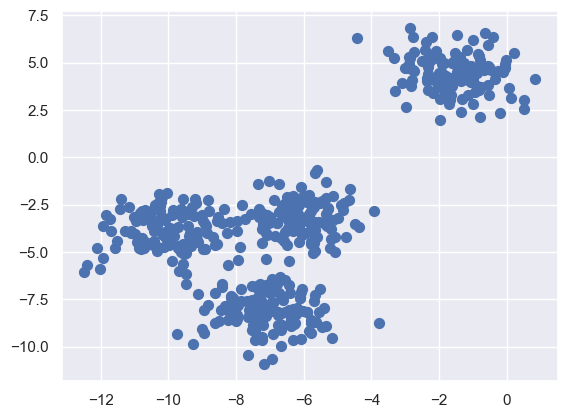

In [5]:
# create a scatter plot from the two coordinates of X 
# HINT: for the x axis you need all the rows of array X and the first column
# set the size of the dots to be 50
plt.scatter(X[:, 0], X[:, 1], s = 50)
# show the plot
plt.show()

C:\Users\SZV7BP\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


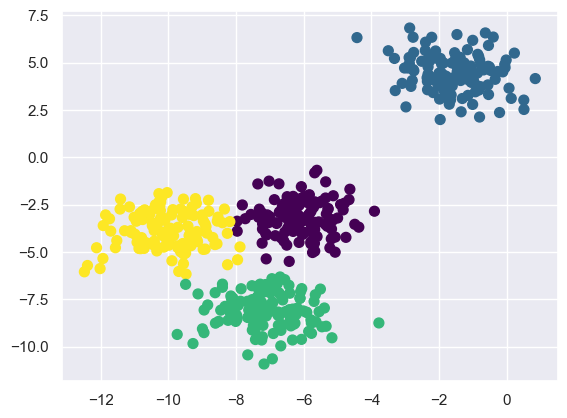

In [9]:
# create the model of KMeans algorithm by function KMeans (save it to variable kmeans)
# we want to get 4 clusters
kmeans = KMeans(n_clusters = 4)
# fit the created model 
kmeans.fit(X)
# predict with your fitted model (save it to variable y_kmeans)
y_kmeans = kmeans.predict(X)
# create a scatter plot from X like before, just this time add y_kmeans to be the color, and add parameter cmap='viridis'
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
# show the plot
plt.show()

In [7]:
# read about cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

[[ -6.08740047  -3.17242795]
 [ -1.54351242   4.43488913]
 [ -7.09302115  -8.11003868]
 [-10.00765826  -3.85079766]]


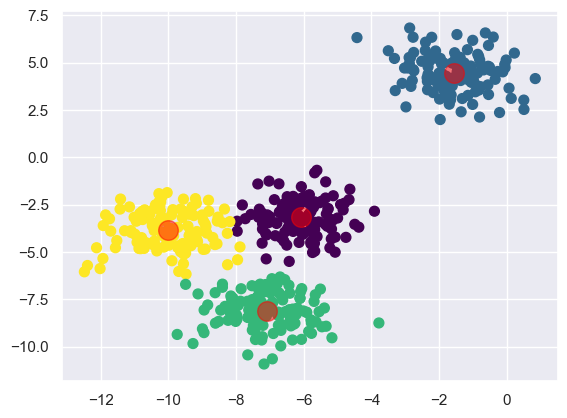

In [10]:
# save the center cooridnates of the clusters to variable centers
# use the kmeans.cluster_centers_ function
centers = kmeans.cluster_centers_
print(centers)
# create the same colorful scatter plot as above
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
# create a scatter plot with x axis: 1.coord of the centers, y axis: 2.coord of the centers
# color it to red, let s=200 and set alpha to 0.5
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.5)
# show the plot
plt.show()

https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html
### Comparing Python Clustering Algorithms

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [10]:
data = np.load('clusterable_data.npy')

An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.

In [11]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

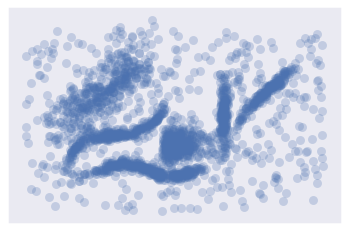

In [12]:
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds) # data.T : transposed array (data[:,0] would do the same)

# hiding the whole axis:
frame = plt.gca() # get current axes (it gets the x and y axes)
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
#plt.axis("off") 
#plt.show()

In [13]:
# Read about *args and **kwargs here: https://www.programiz.com/python-programming/args-and-kwargs
# *args: 
    # Python allows us to pass the variable number of non keyword arguments to function with *args argument
    # suppose you have a function: def adder(*numbers) 
    # you can call it like this: adder(4,5,6,7)
    # the numbers will be treated as a tuple: (4,5,6,7) (so you can e.g. iterate over it)
# **kwargs:
    # Python allows us to pass the variable length of keyword arguments to the function with **kwargs argument
    # a function with param **data (e.g. def intro(**data))
    # will wait for parameters in format key='value'
    # e.g. intro(Firstname="Sita", Lastname="Sharma", Age=22, Phone=1234567890)
    # and it will treat the data as a dictionary

In [14]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    #print(np.unique(labels))
    palette = sns.color_palette('deep', np.unique(labels).max() + 1) # np.unique gives the unique clusters (e.g.[0,1,2,3,4,5])
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.65, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

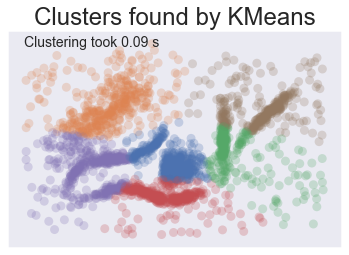

In [15]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

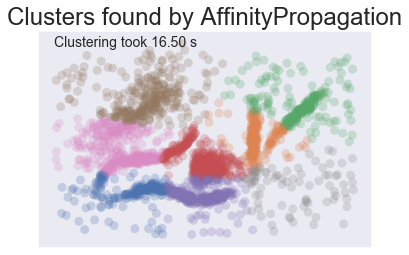

In [16]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

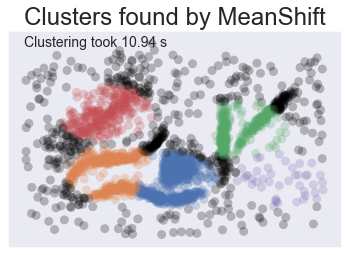

In [17]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})
# for 1-element tuple we have to add a comma

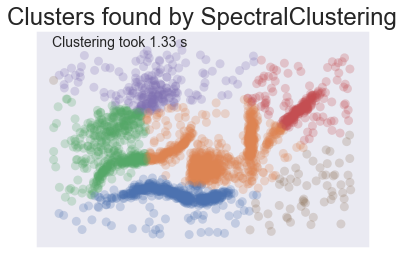

In [18]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

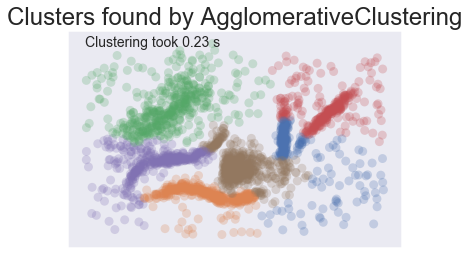

In [19]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

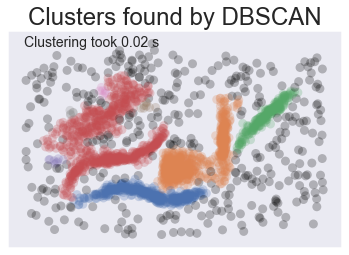

In [20]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

### Gaussian Mixture Model

https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

##### the data

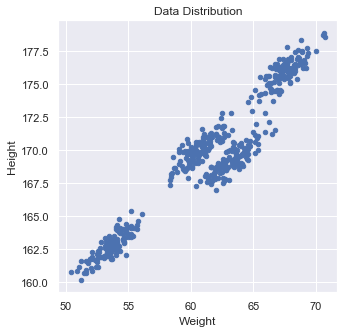

In [57]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')
plt.figure(figsize=(5,5))
plt.scatter(data["Weight"],data["Height"], s=20)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

##### k-means model

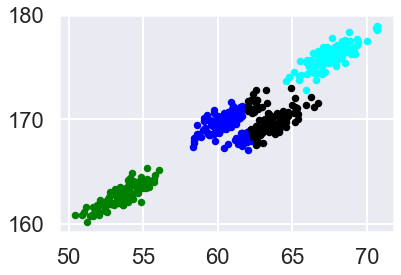

In [23]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()



In [24]:
# of course K-means works in the usual way as well

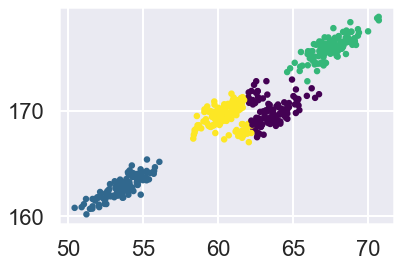

In [25]:
data = pd.read_csv('Clustering_gmm.csv')
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
pred = kmeans.predict(data)
plt.scatter(data['Weight'], data['Height'], c = pred, s = 20, cmap = 'viridis')
# show the plot
plt.show()

##### Gaussian Mixture Model

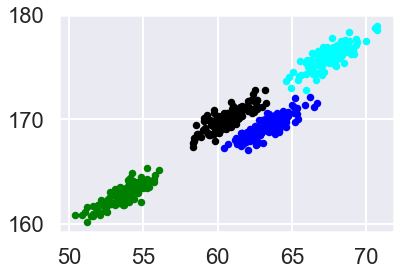

In [26]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()
